# LVM Siderostat Analysis

## Nick Konidaris 23-Nov-2020



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from zernike import RZern
from pylab import *

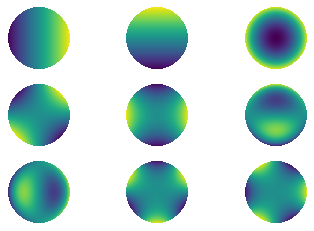

In [17]:
cart = RZern(6)
L, K = 200, 250
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)

c = np.zeros(cart.nk)
plt.figure(1)
for i in range(1, 10):
    plt.subplot(3, 3, i)
    c *= 0.0
    c[i] = 1.0
    Phi = cart.eval_grid(c, matrix=True)
    plt.imshow(Phi, origin='lower', extent=(-1, 1, -1, 1))
    plt.axis('off')

plt.show()

In [155]:
def raytrace(slopes, f_mm=1800, cosangle=np.cos(np.deg2rad(45)), delta_n=2):
    
    k_mm = f_mm * cosangle * delta_n
    mm_to_micron = 1000.
    
    x = np.linspace(-50,50,num=300)
    img = np.zeros_like(x)
    for i in range(slopes.shape[0]):
        for j in range(slopes.shape[1]):
            s = slopes[i,j]
            if not np.isfinite(s): continue
                
            dist = s * k_mm * mm_to_micron
            p = np.argmin(np.abs(x-dist))
            img[p] += 1
    
    return x,img

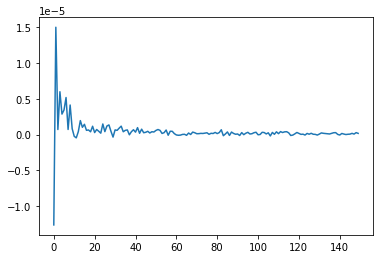

In [162]:
def random_coeffs(Number, exponent=-2):
    
    cs = np.ones(Number)
    for i in range(len(cs)):
        r = np.random.randn() + 1
        cs[i] = r* (i+1) **exponent
    
    cs /= np.sum(cs) * 15000
    return cs


plot(random_coeffs(150, exponent=-1))

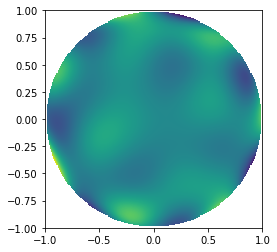

In [157]:
cart = RZern(15)
L, K = 200, 200
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)
c = np.zeros(cart.nk)
c[40] = .5
c[35] = 1
c[23] = .5
c[15] = -.25
c[5] = -.3

c /= np.sum(c) * 25000 # 25 nm RMS
Phi = cart.eval_grid(c, matrix=True)
plt.imshow(Phi, origin='lower', extent=(-1, 1, -1, 1))

rtx,rt = raytrace(np.diff(Phi))

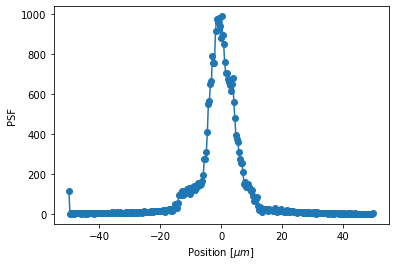

In [159]:
plot(rtx,rt,'o-')
xlabel("Position [$\mu m$]");
ylabel("PSF");


## Show that Slopes are Orthogonal

In [71]:
cart = RZern(5)
L, K = 200, 200
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)
c = np.zeros(cart.nk) 

slopes = np.zeros((len(c), len(c), 3))
diffs = np.zeros_like(slopes[:,:,0])

def handle(i,j,n):
    c[:] = 0
    c[i] = 1
    c[j] = 1
    Phi = cart.eval_grid(c, matrix=True)
    slopes[i,j,n] = np.nanstd(Phi)

for i in range(len(c)):
    for j in range(len(c)):
        handle(i,i,0)
        handle(j,j,1)
        handle(i,j,2)
        
        diffs[i,j] = slopes[i,j,2] - np.sqrt(slopes[i,i,0]**2 + slopes[j,j,1]**2)
        
        

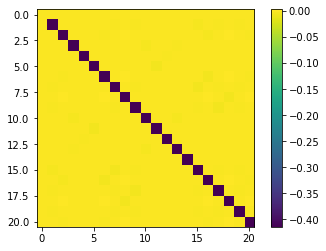

In [72]:
imshow(diffs)
colorbar()

Figure above shows that slopes are orthogonal.

# Now compute the zernike slope content

In [174]:
cart = RZern(15)
L, K = 200, 200
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)
c = np.zeros(cart.nk)

slopes = np.zeros_like(c)
print("%10s %8s" % ("Zernike", "RMS Slope [radian]"))
for i in range(len(c)):
    c[:] = 0
    c[i] = 1
    Phi = cart.eval_grid(c, matrix=True)
    
    rms = np.nanstd(np.diff(Phi))
    slopes[i] = rms
    
    print("%10.0i %1.5e" % (i,rms))


   Zernike RMS Slope [radian]
         0 0.00000e+00
         1 2.13616e-16
         2 1.63309e-16
         3 3.46074e-02
         4 2.45773e-02
         5 2.44711e-02
         6 3.45566e-02
         7 5.95809e-02
         8 3.45566e-02
         9 3.45444e-02
        10 7.58888e-02
        11 6.92756e-02
        12 6.98784e-02
        13 4.44168e-02
        14 4.44540e-02
        15 1.16074e-01
        16 6.78335e-02
        17 8.61245e-02
        18 8.63477e-02
        19 5.41613e-02
        20 5.42699e-02
        21 1.23350e-01
        22 1.19599e-01
        23 1.17676e-01
        24 1.02778e-01
        25 1.02314e-01
        26 6.39222e-02
        27 6.38893e-02
        28 1.04503e-01
        29 1.76963e-01
        30 1.39185e-01
        31 1.38407e-01
        32 1.18888e-01
        33 1.18210e-01
        34 7.37019e-02
        35 7.33230e-02
        36 1.73781e-01
        37 1.67932e-01
        38 1.72370e-01
        39 1.57623e-01
        40 1.59030e-01
        41 1.33711e-01
    

Text(0, 0.5, 'RMS Slope Content [rad]')

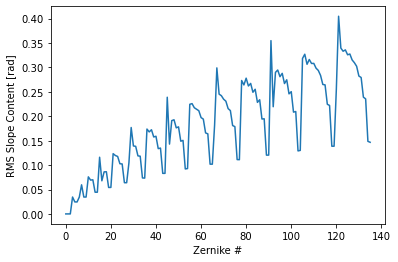

In [177]:
plot(slopes)
xlabel("Zernike #")
ylabel("RMS Slope Content [rad]")